# Business case

    What was the best month for sales? How much was earned that month?
    Which city had the highest number of sales?
    Recommend the most appropriate time to display advertising to maximize the likelihood of customers 
    buying the products?
    What products sold the most?

 
## steps in python

    Loaded Data of each month and made data frame using pandas
    Concatenated Dataset to make one Dataset for 2019 sales.
    Treating Null Values and Junk Data.
    Made a Filtered Dataset after preprocessing data
    Analysis and answers to business problems. (visualizations using matplot and seaborn library) 

In [62]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
# Load Data of each month

df_january = pd.read_csv("Sales_January_2019.csv", header=0)
df_january["Month"] = "January"

df_february = pd.read_csv("Sales_February_2019.csv", header=0)
df_february["Month"] = "February"

df_march = pd.read_csv("Sales_March_2019.csv", header=0)
df_march["Month"] = "March"

df_april = pd.read_csv("Sales_April_2019.csv", header=0)
df_april["Month"] = "April"

df_may = pd.read_csv("Sales_May_2019.csv", header=0)
df_may["Month"] = "May"

df_june = pd.read_csv("Sales_June_2019.csv", header=0)
df_june["Month"] = "June"

df_july = pd.read_csv("Sales_July_2019.csv", header=0)
df_july["Month"] = "July"

df_august = pd.read_csv("Sales_August_2019.csv", header=0)
df_august["Month"] = "August"

df_september = pd.read_csv("Sales_September_2019.csv", header=0)
df_september["Month"] = "September"

df_october = pd.read_csv("Sales_October_2019.csv", header=0)
df_october["Month"] = "October"

df_november = pd.read_csv("Sales_November_2019.csv", header=0)
df_november["Month"] = "November"

df_december = pd.read_csv("Sales_December_2019.csv", header=0)
df_december["Month"] = "December"

In [16]:
# Concatenate datasets

list_datasets = [df_january, df_february, df_march, df_april, df_may, df_june, df_july, df_august, df_september, df_october, df_december]

df = pd.concat(list_datasets)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169189 entries, 0 to 25116
Data columns (total 7 columns):
Order ID            168689 non-null object
Product             168689 non-null object
Quantity Ordered    168689 non-null object
Price Each          168689 non-null object
Order Date          168689 non-null object
Purchase Address    168689 non-null object
Month               169189 non-null object
dtypes: object(7)
memory usage: 10.3+ MB


In [20]:
df.isnull().sum()

Order ID            500
Product             500
Quantity Ordered    500
Price Each          500
Order Date          500
Purchase Address    500
Month                 0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [28]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [40]:
df["Order ID"] = df["Order ID"].astype("str")

C:\Users\ClementSavary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
set_products_values = set(df["Product"].values)
set_products_values

{'20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'Product',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone'}

In [75]:
df[df["Product"] == "Product"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
...,...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December


In [77]:
df = df[df["Product"] != "Product"]

In [83]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int")

C:\Users\ClementSavary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
set(df["Quantity Ordered"].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [86]:
set(df["Price Each"].values)

{'109.99',
 '11.95',
 '11.99',
 '14.95',
 '149.99',
 '150',
 '150.0',
 '1700',
 '1700.0',
 '2.99',
 '3.84',
 '300',
 '300.0',
 '379.99',
 '389.99',
 '400',
 '400.0',
 '600',
 '600.0',
 '700',
 '700.0',
 '99.99',
 '999.99'}

In [88]:
df["Price Each"] = df["Price Each"].astype("float")

C:\Users\ClementSavary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
# Business case 1
df["Sales"] = df["Price Each"] * df["Quantity Ordered"]

C:\Users\ClementSavary\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
series_sales = df.groupby(["Month"])["Sales"].sum().sort_values(ascending = False)

In [105]:
series_sales

Month
December     4.619297e+06
October      3.736884e+06
April        3.396059e+06
May          3.144585e+06
March        2.809063e+06
July         2.646900e+06
June         2.578293e+06
August       2.244412e+06
February     2.203481e+06
September    2.098817e+06
January      1.815335e+06
Name: Sales, dtype: float64

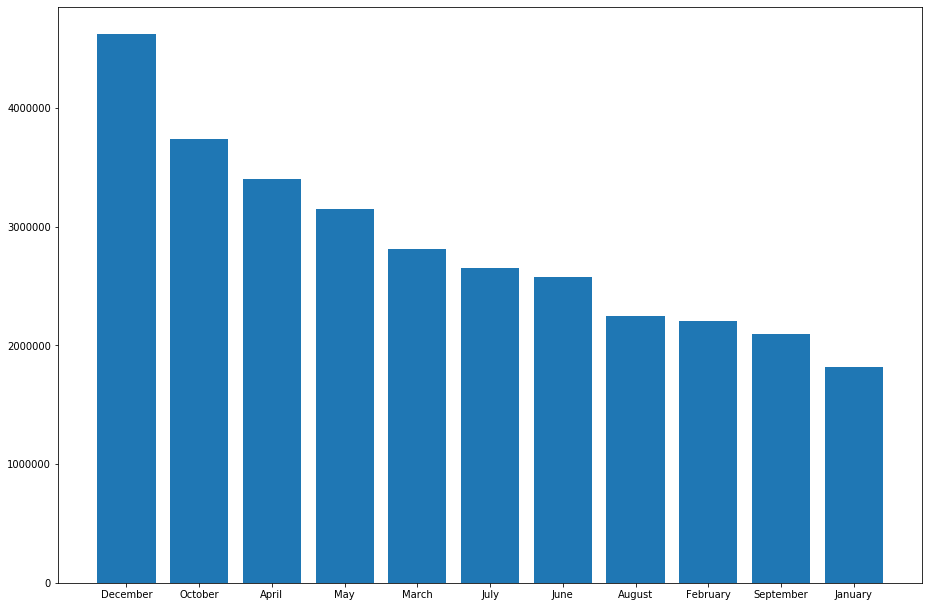

In [114]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(series_sales.index.values,series_sales.values)
plt.show()

In [121]:
("Best month is {} with ${} in sales.").format(series_sales.index[0], round(series_sales[0], 2))

'Best month is December with $4619297.12 in sales.'

In [168]:
# Business case 2 

df["Cities"] = df["Purchase Address"].str.split(",", expand=True)[1]

C:\Users\ClementSavary\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
series_cities_sales = df.groupby(["Cities"])["Sales"].sum().sort_values(ascending=False)

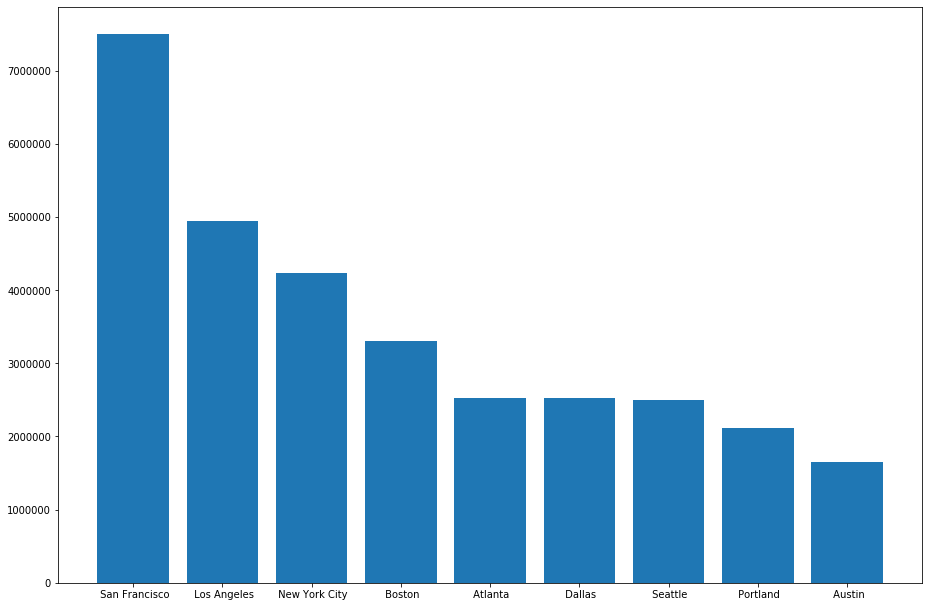

In [170]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(series_cities_sales.index.values, series_cities_sales.values)
plt.show()

In [154]:
"The cities with the biggest sales is {}, with a sales amount of ${}".format(series_cities_sales.index.values[0], round(series_cities_sales.values[0], 2))

'The cities with the biggest sales is  San Francisco, with a sales amount of $7497896.28'

In [155]:
series_cities_sales

Cities
 San Francisco    7.497896e+06
 Los Angeles      4.951548e+06
 New York City    4.235837e+06
 Boston           3.310398e+06
 Atlanta          2.520120e+06
 Dallas           2.519916e+06
 Seattle          2.496056e+06
 Portland         2.113057e+06
 Austin           1.648298e+06
Name: Sales, dtype: float64

In [227]:
# Business case 3
list_time = []
for time in df["Order Date"] : 
    list_time.append(time.split(" ")[1])
    
df["Time"] = pd.Series(list_time)

df.groupby(["Time"])["Sales"].sum().sort_values(ascending=False).head(5).to_frame()

C:\Users\ClementSavary\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sales
Time,
18:59,64998.94
12:09,59494.67
18:55,58939.21
15:29,57811.87
18:56,57730.21


In [199]:
# Business case 4
series_product_quantity = df.groupby(["Product"])["Quantity Ordered"].sum().sort_values(ascending=False)

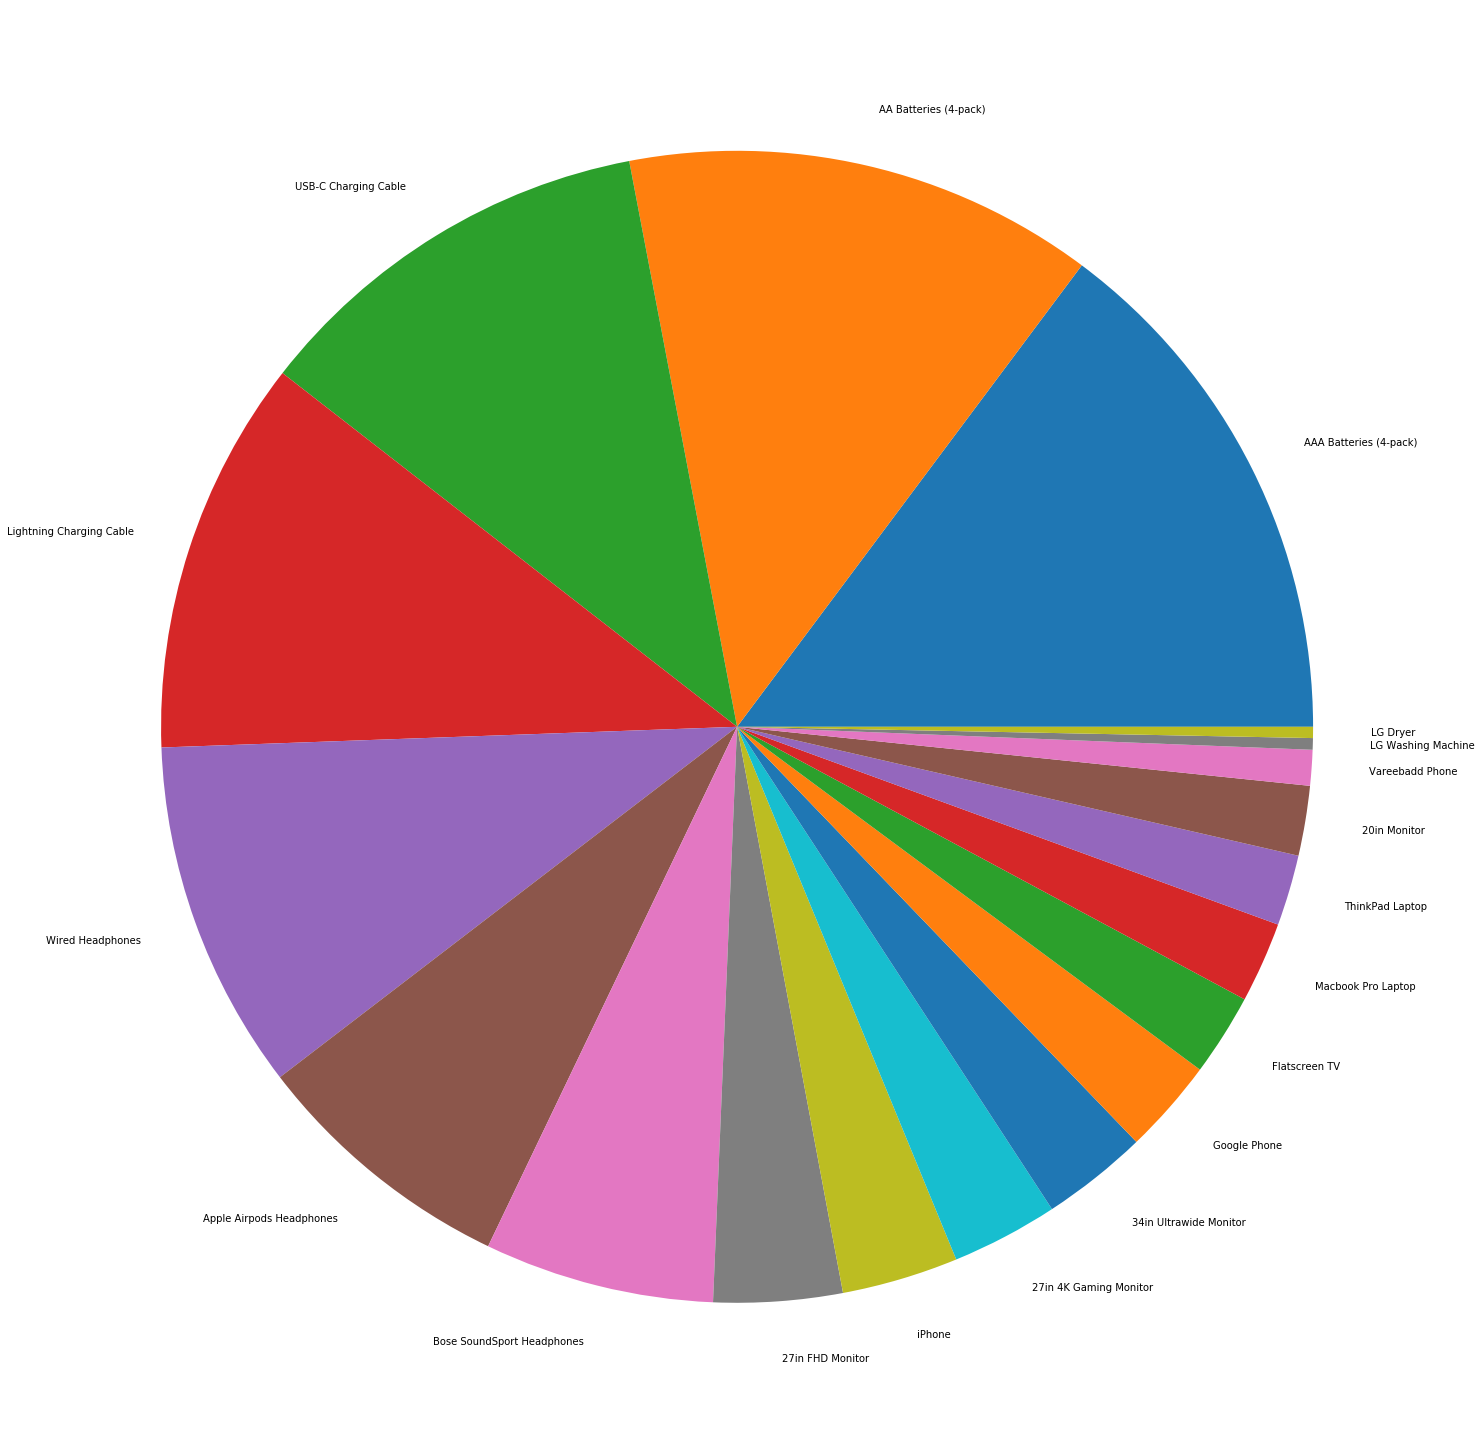

In [212]:
fig = plt.figure()
ax = fig.add_axes([0,0,5,5])
ax.pie(series_product_quantity.values, labels=series_product_quantity.index.values)
plt.show()

In [213]:
"The best seller item is {} with {} items sold.".format(series_product_quantity.index.values[0], series_product_quantity.values[0])

'The best seller item is AAA Batteries (4-pack) with 27990 items sold.'